In [ ]:
'''
  Họ và Tên: Bùi Thị Thanh Xuân
  MSSV: 19110522
'''

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)','Label']

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().any(axis=1).head()  # Kiểm tra các dữ liệu có Null hay không

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
df[df.isnull().any(axis=1)].head()   # Kiểm tra các phần tử theo dòng có thuộc tính chứa giá trị Null / NaN)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label


In [ ]:
#Chuyển label dữ liệu về dạng onehot 
class_la = LabelEncoder()
y = class_la.fit_transform(df['Label'].values)

In [ ]:
y = np.reshape(y, -1)
y.shape


(150,)

In [ ]:
# Lấy giá trị từ các đặc trưng 
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] #Đặt tên cho các đặc trưng
x=df[features].copy()   # Lấy giá trị từ các thuộc tính buổi sáng 9am.
x.columns     # Xem các thuộc tính của x

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# Phân tập dữ liệu và label thành tập train và tập test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
Dec_tree_iris = DecisionTreeClassifier(max_leaf_nodes=10)   # Khởi tạo mô hình Decision Tree
Dec_tree_iris.fit(X_train,y_train)     # Dùng x và y để huấn luyện mô hình

DecisionTreeClassifier(max_leaf_nodes=10)

In [ ]:
y_predicted = Dec_tree_iris.predict(X_test)

In [ ]:
y_predicted[:10]   # Label dự đoán trên tập test dựa trên mô hình học được


array([0, 2, 0, 2, 1, 1, 0, 1, 1, 1])

In [ ]:
y_test[:10]     # Label thực tế của tập test

array([0, 2, 0, 2, 1, 2, 0, 1, 1, 1])

In [ ]:
accuracy_score(y_test,y_predicted)*100  # Tính độ chính xác của mô hình trên tập test

98.0

In [ ]:
from sklearn import tree
tree.export_graphviz(Dec_tree_iris, out_file='tree.dot')      # Lưu model vào 'tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])   # Chuyển model sang dạng png

0

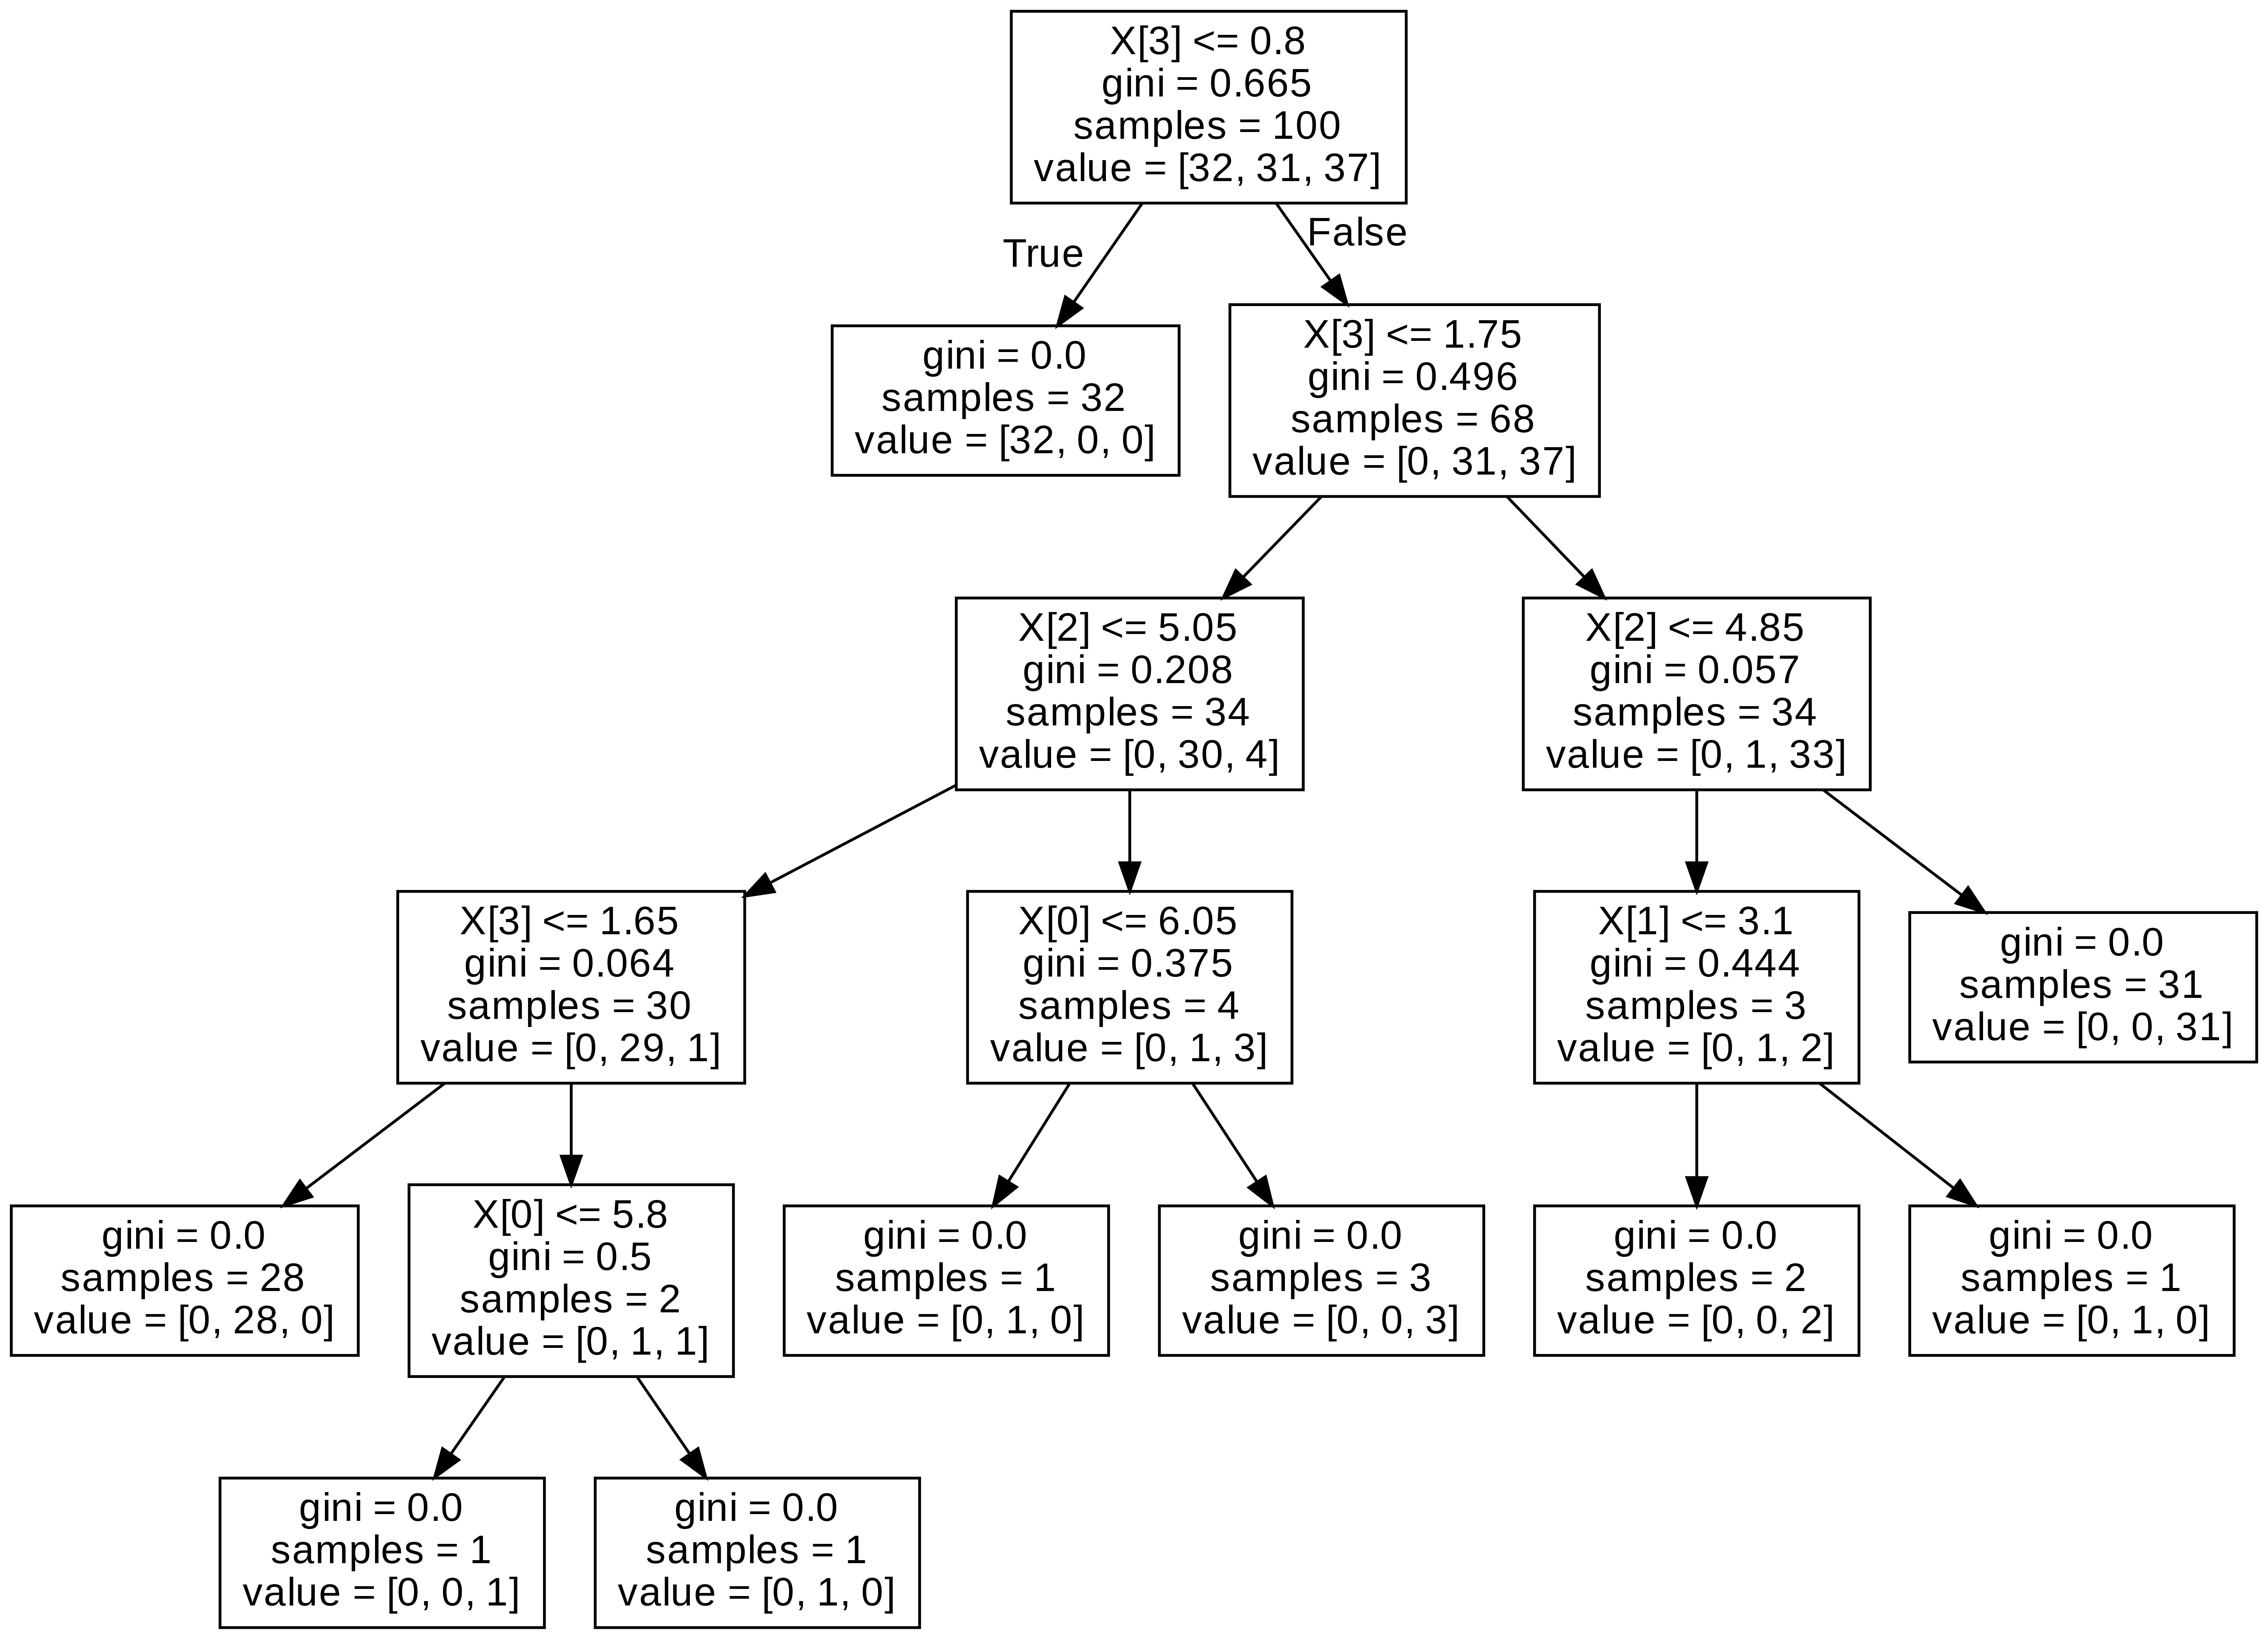

In [ ]:
from IPython.display import Image
Image(filename = 'tree.png')     # Load file 'tree.png'